# Augmented Reality with Planar Homographies

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from utils import *


In [3]:
# gettig correseponding points from the image and the video using SIFT
def get_points(img, video):
    """
    This function takes in an image and a video and returns the corresponding points and plot matches
    params:
        img: grayscale image
        video: video file
    returns:
        img_pts: corresponding points in the image
        video_pts: corresponding points in the video
        
    """
    # SIFT
    sift = cv.xfeatures2d.SIFT_create()
    kp1, dest1 = sift.detectAndCompute(img, None)
    # kp2, dest2 = sift.detectAndCompute(video, None)

    kp2 = []
    dest2 = []
    for frame in video:
        kp, dest = sift.detectAndCompute(frame, None)
        kp2.append(kp)
        dest2.append(dest)

    # BFMatcher
    bf = cv.BFMatcher()
    # matches = bf.knnMatch(dest1, dest2, k=2)

    # Apply BFMatcher to all the frames in the video
    matches = []
    for dest_video in dest2:
        matches.append(bf.knnMatch(dest1, dest_video, k=2))

    # Apply ratio test to all the matches
    good = []
    for match in matches:
        good.append([m for m, n in match if m.distance < 0.75*n.distance])
        
    # get the corresponding points in the image and the video
    img_pts = []
    video_pts = []
    for i in range(len(good)):
        for m in good[i]:
            img_pts.append(kp1[m.queryIdx].pt)
            video_pts.append(kp2[i][m.trainIdx].pt)
    
    # plot matches for every frame
    augmented_video = []
    for i in range(len(good)):
        img3 = cv.drawMatches(img, kp1, video[i], kp2[i], good[i], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        augmented_video.append(img3)
    
    return img_pts, video_pts, augmented_video
    


In [2]:
video_path = 'book.mov'
frames = readVideo(video_path)
img = cv.imread('cv_cover.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
# get points
img_pts, video_pts , animated_video = get_points(img, frames)

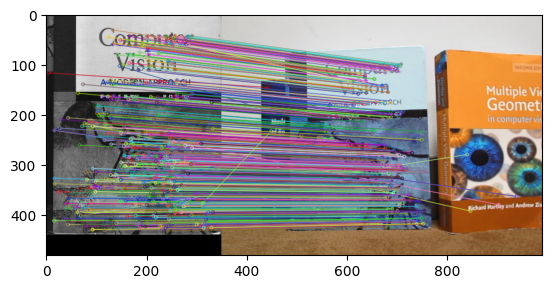

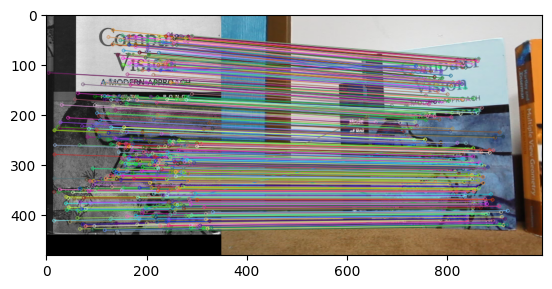

In [18]:
# plot matches for every frame (NOT WORKING)
im = plt.imshow(animated_video[200])
plt.show()
im = plt.imshow(animated_video[300])
plt.show()